# Demo:  Predicting Glucose Levels using Mulitple Linear Regression

In this demo, you will learn how to:
* Fit multiple linear regression models using python's `sklearn` pachage.  
* Split data into training and test.
* Manipulating and visualizing multivariable arrays.

We first load the packages as usual.

In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Diabetes Data Example
To illustrate the concepts, we load the well-known diabetes data set.  This dataset is included in the `sklearn.datasets` module and can be loaded as follows.

In [54]:
from sklearn import datasets, linear_model, preprocessing

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The target values `y` represent the blood glucose levels that we wish to predict.  The number of attributes and samples are computed from the shape:

In [55]:
nsamp, natt = X.shape
print("num samples={0:d}  num attributes={1:d}".format(nsamp,natt))

num samples=442  num attributes=10


## Using Simple Linear Regression

As a first attempt to predict the glucouse level, we could try *one attribute at a time*.  That is, for each attribute $x_k$, we could attempt to fit a [simple linear regression](../simp_lin_reg/readme.md) model:
$$ \hat{y} = \beta_{0,k} + \beta_{1,k}x_k$$
where $\beta_{0,k}$ and $\beta_{1,k}$ are the coefficients in the simple linear regression model using only the attribute $x_k$.

Now, we saw in class, that the goodness of fit in a simple linear regression model is given by the coefficient of determination.  Let $R_k^2$ be the coefficient for predicting $y$ from the $k$-th predictor $x_k$:
$$R^2_k = \frac{|s_{x_k,y}|^2}{s_{x_k}^2 s_y^2}$$.
The following code computes $R^2_k$ for each variable $k$.

In [56]:
ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
for k in range(natt):
    xm = np.mean(X[:,k])
    sxy = np.mean((X[:,k]-xm)*(y-ym))
    sxx = np.mean((X[:,k]-xm)**2)
    Rsq[k] = (sxy)**2/sxx/syy
    
    print("{0:2d}  Rsq={1:f}".format(k,Rsq[k]))
    

 0  Rsq=0.035302
 1  Rsq=0.001854
 2  Rsq=0.343924
 3  Rsq=0.194908
 4  Rsq=0.044954
 5  Rsq=0.030295
 6  Rsq=0.155859
 7  Rsq=0.185290
 8  Rsq=0.320224
 9  Rsq=0.146294


We see that the best $R^2_k = 0.34$.  This demonstrates that using only a single variable provides a poor prediction of the target variable.  We can see this in the scatter plot.

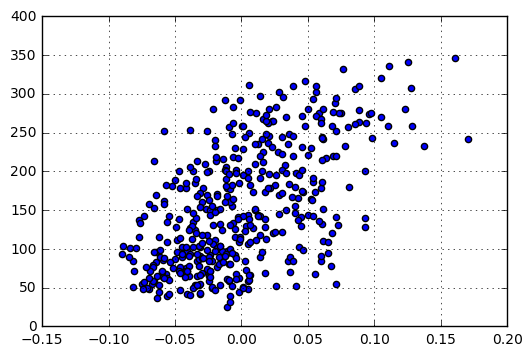

In [57]:
imax = np.argmax(Rsq)
plt.scatter(X[:,imax],y)
plt.grid()
plt.show()

## Improvements with a Multiple Variable Linear Model

The above experiments motivates us to use a multiple variable linear regression model, where we can use multiple predictors, $x_k$ at once.  We can fit the multipe linear model using the `sklearn` package.  

For reasons that we will explain in the next demo, we need to split the data into two parts:  one part for training the model and a second part for testing the fit.  In this example, we will use 300 samples for training and the remaining 142 for testing.

In [58]:
ns_train = 300
ns_test = nsamp - ns_train
X_tr = X[:ns_train,:]     # Gets the first ns_train rows of X
y_tr = y[:ns_train]       # Gets the correspoinding rows of y

Create a regression object and fit the data.

In [59]:
regr = linear_model.LinearRegression()
regr.fit(X_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

You can see the coefficients

In [60]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

Compute the error on the training data

In [61]:
y_tr_pred = regr.predict(X_tr)
RSS = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2)
print("Normalized RSS={0:f}".format(RSS))

Normalized RSS=0.485281


We see this is higher than the best single variable model.  

We also plot a scatter plot.

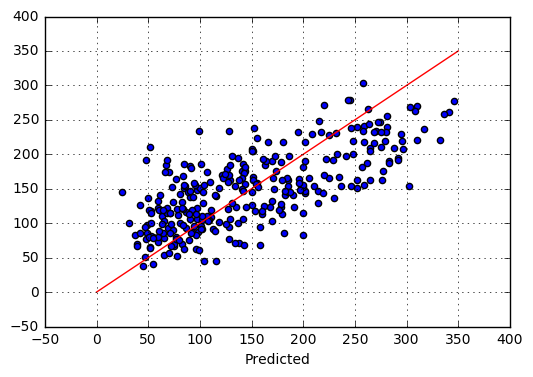

In [62]:
plt.scatter(y_tr,y_tr_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

## Validate on Test Data

In [63]:
X_test = X[ns_train:,:]
y_test = y[ns_train:]
y_test_pred = regr.predict(X_test)
RSS = np.mean((y_test_pred-y_test)**2)/(np.std(y_test)**2)
print("Normalized RSS={0:f}".format(RSS))

Normalized RSS=0.492801


Plot the fit on the test data

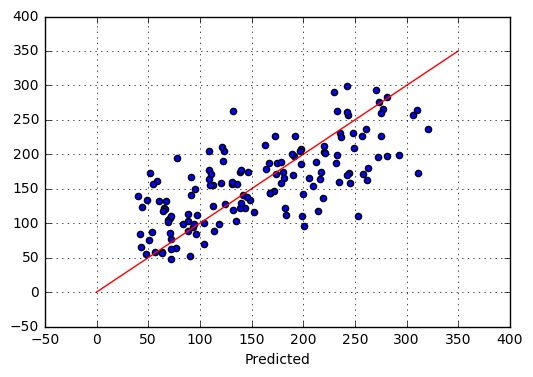

In [64]:
plt.scatter(y_test,y_test_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

## Manually computing the coefficients

We can manually compute the regression coefficients using the least-squares matrix formula in class.  We first construct the matrix $\mathbf{A} = [ \mathbf{1} ~ \mathbf{X} ]$.  This is performed with the `ones` command and `hstack`.  Note that after we do this, `A` has 11 columns -- one more column that the data matrix `X_tr`.

In [14]:
ones = np.ones((ns_train,1))
A = np.hstack((ones,X_tr))
A.shape

(300, 11)

We next use the `lstsq` method to solve $\mathbf{y} \approx \mathbf{A\beta}$.  This will find the desired least-squares fit.

In [15]:
out = np.linalg.lstsq(A,y_tr)
beta = out[0]

We can see the coefficients

In [16]:
beta

array([ 152.34786452,  -16.57607993, -254.66532396,  560.98630022,
        278.91811152, -393.41357305,   97.05460405,  -19.0023093 ,
        169.46450327,  632.95050374,  114.21638941])

We see that `beta[0]` mathches the intercept in `regr.intercept_` from the regression fit and `beta[1:]` matches the coefficients in `regr.coef_`.

In [17]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

In [18]:
regr.intercept_

152.34786451820108